<h2>Описание проекта</h2>

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

*Описание данных*

* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software  Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
    - «EC» («Early childhood») — «Для детей младшего возраста»
    - «E» («Everyone») — «Для всех» 
    - «E10+» («Everyone 10 and older») — «Для всех старше 10 лет»
    - «T» («Teen») — «Подросткам 13—19 лет»
    - «M» («Mature») — «От 17 лет»
    - «AO» («Adults Only 18+») — «Только для взрослых»
    - «RP» ( «Rating Pending»») — «Рейтинг ожидается»


<b>Введение. </b>

 Перед непосредственно анализом, изучим предоставленные данные. Выполним предобработку, определим пропуски, дубликаты, при необходимости выполним удаление или подстановку логически обоснованного значения. Изучим статистику по параметрам ключевых стобцов(год выпуска игры, платформы, продажи и т д). Далее определим информацию, актуальную для исследования. Используя методы визуализации, определим влияние на продажи различных факторов. Рассмотрим  распределение игр по жанрам. Так же, составим "портрет" пользователя из каждого региона, выделим популярные жанры, платформы для регионов, влияние рейтинга ESRB на продажи в отдельном регионе.
       
<b>Проверим гипотезы:</b>
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.


**1. Изучаем предоставленные данные** 

In [1]:
import pandas as pd
import seaborn as sns
sns.set(palette='inferno',  color_codes=False)

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as st
from functools import reduce
idx = pd.IndexSlice
from scipy import stats as st



In [2]:
data = pd.read_csv('/datasets/games.csv', index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16715 entries, Wii Sports to Winning Post 8 2016
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Platform         16715 non-null  object 
 1   Year_of_Release  16446 non-null  float64
 2   Genre            16713 non-null  object 
 3   NA_sales         16715 non-null  float64
 4   EU_sales         16715 non-null  float64
 5   JP_sales         16715 non-null  float64
 6   Other_sales      16715 non-null  float64
 7   Critic_Score     8137 non-null   float64
 8   User_Score       10014 non-null  object 
 9   Rating           9949 non-null   object 
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [3]:
data.head()

,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
Name,,,,,,,,,,
Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<h2> Выполним предобработку данных </h2>

Как мы видим, названия столбцов имеют "некрасивый" вид, а так же следует поработать над содержанием. Следует привести все названия в нижний регистр, заменить тип данных(в графах с годом выпуска и оценкой пользователей), а так же обработать пропущенные значения.


- Приводим к нижнему регистру названия столбцов. Так же выводим из индекса названия игр.
- Приведем к нижнему регистру следующие столбцы: название, платформа, жанр, рейтинг.

In [4]:
data=data.reset_index(level=0)
data.columns = data.columns.str.lower()

print(data.columns)

for column in data[['name','platform','genre','rating']]:
    data[column] = data[column].str.lower()

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Заменим тип данных в необходимых столбцах:
- год выпуска игры (с вещественного — на целочисленный) (будет выполнено далее, после удаления пропусков)
- оценка пользователей (со строчного — на вещественный)

*Посмотрим на количество пропусков в столбцах:* 

In [6]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Пропуски наблюдаются в столбцах с годом издания игры, оценками критиков и пользователей и рейтинге от организации ESRB.
Так же, имеется два пропуска  в названии игр. Строки с этими пропусками имеет смысл удалить.
Строки с пропущенными оценками есть смысл заполнить нулевыми значениями, чтобы в дальнейшем они не влияли на статистику. Пропуски в них вызваны, вероятно, отсутсвием оценок или их неопределенностью. Так же имеет смысл посмотреть на уникальные значения в столбцах с пропусками, чтобы выявить "неявные" пропуски, т е некие артефактные значения.


In [7]:
print('rating', data['rating'].unique())
print('В принципе, ничего "выдающегося"')
print()
print('user_score', data['user_score'].unique())
print('Наблюдаем наличие некоего tbd.') 
print(' Исходя из гугла, это аббривеатура, обозначающая неопределенность. Т е, можно считать за пропуски.')
print()
print('critic_score', data['critic_score'].unique())
print('Всё нормально')
print()
print('year_of_release', data['year_of_release'].unique())
print('Всё нормально')

rating ['e' nan 'm' 't' 'e10+' 'k-a' 'ao' 'ec' 'rp']
В принципе, ничего "выдающегося"

user_score ['8' nan '8.3' '8.5' '6.6' '8.4' '8.6' '7.7' '6.3' '7.4' '8.2' '9' '7.9'
 '8.1' '8.7' '7.1' '3.4' '5.3' '4.8' '3.2' '8.9' '6.4' '7.8' '7.5' '2.6'
 '7.2' '9.2' '7' '7.3' '4.3' '7.6' '5.7' '5' '9.1' '6.5' 'tbd' '8.8' '6.9'
 '9.4' '6.8' '6.1' '6.7' '5.4' '4' '4.9' '4.5' '9.3' '6.2' '4.2' '6' '3.7'
 '4.1' '5.8' '5.6' '5.5' '4.4' '4.6' '5.9' '3.9' '3.1' '2.9' '5.2' '3.3'
 '4.7' '5.1' '3.5' '2.5' '1.9' '3' '2.7' '2.2' '2' '9.5' '2.1' '3.6' '2.8'
 '1.8' '3.8' '0' '1.6' '9.6' '2.4' '1.7' '1.1' '0.3' '1.5' '0.7' '1.2'
 '2.3' '0.5' '1.3' '0.2' '0.6' '1.4' '0.9' '1' '9.7']
Наблюдаем наличие некоего tbd.
 Исходя из гугла, это аббривеатура, обозначающая неопределенность. Т е, можно считать за пропуски.

critic_score [76. nan 82. 80. 89. 58. 87. 91. 61. 97. 95. 77. 88. 83. 94. 93. 85. 86.
 98. 96. 90. 84. 73. 74. 78. 92. 71. 72. 68. 62. 49. 67. 81. 66. 56. 79.
 70. 59. 64. 75. 60. 63. 69. 50. 25. 42. 44

In [8]:
print('Смотрим на количество tbd и сопутствующие данные:')
data[data['user_score'] == 'tbd']

Смотрим на количество tbd и сопутствующие данные:


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,zumba fitness,wii,2010.0,sports,3.45,2.59,0.0,0.66,NaN,tbd,e
301,namco museum: 50th anniversary,ps2,2005.0,misc,2.08,1.35,0.0,0.54,61.0,tbd,e10+
520,zumba fitness 2,wii,2011.0,sports,1.51,1.03,0.0,0.27,NaN,tbd,t
645,udraw studio,wii,2010.0,misc,1.65,0.57,0.0,0.20,71.0,tbd,e
657,frogger's adventures: temple of the frog,gba,NaN,adventure,2.15,0.18,0.0,0.07,73.0,tbd,e
...,...,...,...,...,...,...,...,...,...,...,...
16695,planet monsters,gba,2001.0,action,0.01,0.00,0.0,0.00,67.0,tbd,e
16697,bust-a-move 3000,gc,2003.0,puzzle,0.01,0.00,0.0,0.00,53.0,tbd,e
16698,mega brain boost,ds,2008.0,puzzle,0.01,0.00,0.0,0.00,48.0,tbd,e
16704,plushees,ds,2008.0,simulation,0.01,0.00,0.0,0.00,NaN,tbd,e


In [9]:
print('Получаем значительное количество. Избавляемся от аббривиатуры и других пропусков.')
print('Удаляем значения без названий.')
data['user_score']= data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')
data['user_score'] = data['user_score'].fillna(0)
data['critic_score'] = data['critic_score'].fillna(0)
data['genre'] = data['genre'].fillna(0)


data.dropna(subset=['name'], inplace=True)
print('Количество пропусков в столбце name - {}'.format(data['name'].isnull().sum()))
print('Количество пропусков в столбце genre - {}'.format(data['genre'].isnull().sum()))

Получаем значительное количество. Избавляемся от аббривиатуры и других пропусков.
Удаляем значения без названий.
Количество пропусков в столбце name - 0
Количество пропусков в столбце genre - 0


*Обработка пропусков года выхода игр*



In [10]:
nan_year_data = data[data['year_of_release'].isna()]
#print(nan_year_data)

print('Процент игр без года релиза от всех:', round(len(nan_year_data)*100/len(data), 2), '%')


Процент игр без года релиза от всех: 1.61 %


Так как процент достаточно небольшой, можно удалить эти строки, тк для анализа в дальнейшем информация с неизвестной датой релиза будет неактуальна.

In [11]:
data.drop(data[data['year_of_release'].isna()].index,inplace=True)
data['year_of_release'] = pd.to_numeric(data['year_of_release'], downcast='integer')
data['year_of_release'] = data['year_of_release'].astype('Int64')
data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           9768 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


In [12]:
print('Посчитаем количество дубликатов:')
data.duplicated().sum()

Посчитаем количество дубликатов:


0

In [13]:
print('Посмотрим, какие платформы для игры у нас имеются:')
data['platform'].value_counts()

Посмотрим, какие платформы для игры у нас имеются:


ps2     2127
ds      2121
ps3     1306
wii     1286
x360    1232
psp     1193
ps      1190
pc       957
gba      811
xb       803
gc       542
3ds      512
psv      429
ps4      392
n64      316
xone     247
snes     239
sat      173
wiiu     147
2600     116
nes       98
gb        97
dc        52
gen       27
ng        12
ws         6
scd        6
3do        3
tg16       2
gg         1
pcfx       1
Name: platform, dtype: int64

In [14]:
print('Посмотрим, какие жанры игр мы имеем и нет ли повторений:')
data['genre'].value_counts()

Посмотрим, какие жанры игр мы имеем и нет ли повторений:


action          3307
sports          2306
misc            1721
role-playing    1481
shooter         1296
adventure       1293
racing          1226
platform         878
simulation       857
fighting         837
strategy         673
puzzle           569
Name: genre, dtype: int64

In [15]:
data_alt=data.copy()

*Обработаем пропуски в столбце rating*
<br>В отношении них есть два варианта действий: либо заполнить нулевыми или Nan-значениями, т к возрастной рейтинг очень субьективное значение, либо заполнить пропуски самой распространенной оценкой в этом жанре. Решила пойти по сложному пути и выбрала второй вариант.
Сначала составляем рейтинг через словарь. 

In [16]:
genre_list = data['genre'].unique()
genre_dict = {}
for genre in genre_list:
    print('Популярные оценки для жанра ', genre)
    rating_value_counts = data[data['genre'] == genre]['rating'].value_counts()
    print(rating_value_counts, end='\n\n')
    genre_dict[genre] = rating_value_counts.index[0]
    
genre_dict

Популярные оценки для жанра  sports
e       1162
t        195
e10+     105
m         16
Name: rating, dtype: int64

Популярные оценки для жанра  platform
e       354
e10+    141
t        63
m         3
Name: rating, dtype: int64

Популярные оценки для жанра  racing
e       576
t       167
e10+     95
m        18
Name: rating, dtype: int64

Популярные оценки для жанра  role-playing
t       415
m       161
e10+    111
e        83
Name: rating, dtype: int64

Популярные оценки для жанра  puzzle
e       284
e10+     42
t        10
Name: rating, dtype: int64

Популярные оценки для жанра  misc
e       449
t       228
e10+    166
m        13
ec        5
k-a       1
Name: rating, dtype: int64

Популярные оценки для жанра  shooter
m       553
t       340
e10+     56
e        47
Name: rating, dtype: int64

Популярные оценки для жанра  simulation
e       321
t       186
e10+     47
m         5
Name: rating, dtype: int64

Популярные оценки для жанра  action
t       670
m       596
e10+    468
e    

{'sports': 'e',
 'platform': 'e',
 'racing': 'e',
 'role-playing': 't',
 'puzzle': 'e',
 'misc': 'e',
 'shooter': 'm',
 'simulation': 'e',
 'action': 't',
 'fighting': 't',
 'adventure': 'e',
 'strategy': 't'}

Далее формируем функцию для заполнения пропусков оценкой, рспространенной в конкретном жанре.
Выводим информацию о датафрейме для проверки.

In [17]:
data['rating'] = data['rating'].fillna('newrating')

def fill_rating(row):
    if row[10] == 'newrating':
        row[10] = genre_dict[row[3]]
    return row

data= data.apply(fill_rating, axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


**Обработаем пропуски в оценках пользователей и критиков**

Изначально я придерживалась мнения, что это достаточно субъективные цифры, на которые влияют много факторов, и их "угадывание" может повлиять на результаты. Но я так понимаю, все-таки в рамках задания их нужно вывести и заполнить пропуски.
<br>Использую тот же метод, что и в предыдущем пункте.
<br>Но для начала вывожу методом describe статистические данные по жанрам с целью сравнить средне и медианное значения и оценки других показателей, чтобы решить, что лучше использовать для заполнения пропусков.

In [18]:
genre_list = data['genre'].unique()
genre_dict_user = {}
for genre in genre_list:
    print('Статистика по оценкам пользователей в жанре ', genre)
    uscore_value_counts = data[data['genre'] == genre]['user_score'].describe() 
    print(uscore_value_counts, end='\n\n')
    genre_dict_user[genre] = uscore_value_counts
    
#genre_dict

Статистика по оценкам пользователей в жанре  sports
count    2306.000000
mean        3.258673
std         3.642492
min         0.000000
25%         0.000000
50%         0.000000
75%         7.200000
max         9.500000
Name: user_score, dtype: float64

Статистика по оценкам пользователей в жанре  platform
count    878.000000
mean       3.528132
std        3.800731
min        0.000000
25%        0.000000
50%        0.000000
75%        7.600000
max        9.400000
Name: user_score, dtype: float64

Статистика по оценкам пользователей в жанре  racing
count    1226.000000
mean        3.612316
std         3.691396
min         0.000000
25%         0.000000
50%         3.350000
75%         7.400000
max         9.500000
Name: user_score, dtype: float64

Статистика по оценкам пользователей в жанре  role-playing
count    1481.000000
mean        3.794193
std         3.890092
min         0.000000
25%         0.000000
50%         0.000000
75%         7.800000
max         9.700000
Name: user_score, 

По полученным данным можно сказать, что среднее всегда меньше медианного значения, но не значительно, так что для заполнения пропусков можно использовать среднюю оценку, т к она органично вписывается в значения квартилей и с меньшей вероятностью будет давать "переоценку" игры по сравнению с более высоким медианным значением.

In [19]:
genre_list = data['genre'].unique()
genre_dict_user = {}
for genre in genre_list:
    print('Средняя оценка пользователя в жанре ', genre, ':')
    uscore_value_counts =  round(data[data['genre'] == genre]['user_score'].mean(),  1) 
    print(uscore_value_counts, end='\n\n')
    genre_dict_user[genre] = uscore_value_counts 
    

Средняя оценка пользователя в жанре  sports :
3.3

Средняя оценка пользователя в жанре  platform :
3.5

Средняя оценка пользователя в жанре  racing :
3.6

Средняя оценка пользователя в жанре  role-playing :
3.8

Средняя оценка пользователя в жанре  puzzle :
1.6

Средняя оценка пользователя в жанре  misc :
1.7

Средняя оценка пользователя в жанре  shooter :
4.9

Средняя оценка пользователя в жанре  simulation :
2.8

Средняя оценка пользователя в жанре  action :
3.8

Средняя оценка пользователя в жанре  fighting :
3.4

Средняя оценка пользователя в жанре  adventure :
1.6

Средняя оценка пользователя в жанре  strategy :
3.3



In [20]:
data['user_score'] = data['user_score'].fillna('newuscore')

def fill_uscores(row):
    if row[9] == 'newuscore':
        row[9] = genre_dict_user[row[3]]
    return row

data= data.apply(fill_uscores, axis=1)
 

*По тому же принципу обработаем пропуски в данных  с оценками критиков.*

Сначала оценим статистические данные:

In [21]:
genre_list = data['genre'].unique()
genre_dict_critic = {}
for genre in genre_list:
    print('Статистика по оценкам критиков в жанре ', genre)
    crscore_value_counts = data[data['genre'] == genre]['critic_score'].describe()
    print(crscore_value_counts, end='\n\n')
    genre_dict_critic[genre] = crscore_value_counts

Статистика по оценкам критиков в жанре  sports
count    2306.000000
mean       36.371206
std        37.336392
min         0.000000
25%         0.000000
50%        31.000000
75%        75.000000
max        98.000000
Name: critic_score, dtype: float64

Статистика по оценкам критиков в жанре  platform
count    878.000000
mean      38.019362
std       35.257429
min        0.000000
25%        0.000000
50%       51.000000
75%       71.000000
max       97.000000
Name: critic_score, dtype: float64

Статистика по оценкам критиков в жанре  racing
count    1226.000000
mean       40.216150
std        35.201133
min         0.000000
25%         0.000000
50%        54.000000
75%        72.000000
max        96.000000
Name: critic_score, dtype: float64

Статистика по оценкам критиков в жанре  role-playing
count    1481.000000
mean       35.861580
std        37.299506
min         0.000000
25%         0.000000
50%         0.000000
75%        73.000000
max        96.000000
Name: critic_score, dtype: float

В целом, тут та же ситуация. Заменяем пропуски на среднее значение.

In [22]:
genre_list = data['genre'].unique()
genre_dict_critic = {}
for genre in genre_list:
    print('Средняя оценка пользователя в жанре ', genre, ':')
    crscore_value_counts =  round(data[data['genre'] == genre]['critic_score'].mean(),  1) 
    print(crscore_value_counts, end='\n\n')
    genre_dict_critic[genre] = crscore_value_counts 
    
#genre_dict_critic

Средняя оценка пользователя в жанре  sports :
36.4

Средняя оценка пользователя в жанре  platform :
38.0

Средняя оценка пользователя в жанре  racing :
40.2

Средняя оценка пользователя в жанре  role-playing :
35.9

Средняя оценка пользователя в жанре  puzzle :
26.0

Средняя оценка пользователя в жанре  misc :
19.7

Средняя оценка пользователя в жанре  shooter :
50.0

Средняя оценка пользователя в жанре  simulation :
27.9

Средняя оценка пользователя в жанре  action :
37.3

Средняя оценка пользователя в жанре  fighting :
33.5

Средняя оценка пользователя в жанре  adventure :
16.2

Средняя оценка пользователя в жанре  strategy :
31.7



In [23]:
data['critic_score'] = data['critic_score'].fillna('newcrscore')

def fill_crscores(row):
    if row[8] == 'newcrscore':
        row[8] = genre_dict_critic[row[3]]
    return row

data = data.apply(fill_crscores, axis=1)
 

In [24]:
print('Проверяем:')
print('Количество пропусков в столбце critic_score - {}'.format(data['critic_score'].isnull().sum()))
print('Количество пропусков в столбце user_score - {}'.format(data['user_score'].isnull().sum()))
print(data.info())

Проверяем:
Количество пропусков в столбце critic_score - 0
Количество пропусков в столбце user_score - 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     16444 non-null  float64
 9   user_score       16444 non-null  float64
 10  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB
None


<h2> Исследовательский анализ данных.</h2>

*Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.*

Создадим новый столбец total_sales и прибавим продажи всех столбцов и выведем первые пять строк таблицы:

In [25]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,e,82.54
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,0.0,0.0,e,40.24
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,e,35.52
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,e,32.77
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,0.0,0.0,t,31.38


**Посмотрим, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?**

Методом pivot_table сформируем таблицу и построим линейный график зависимости количества игр от года выпуска.

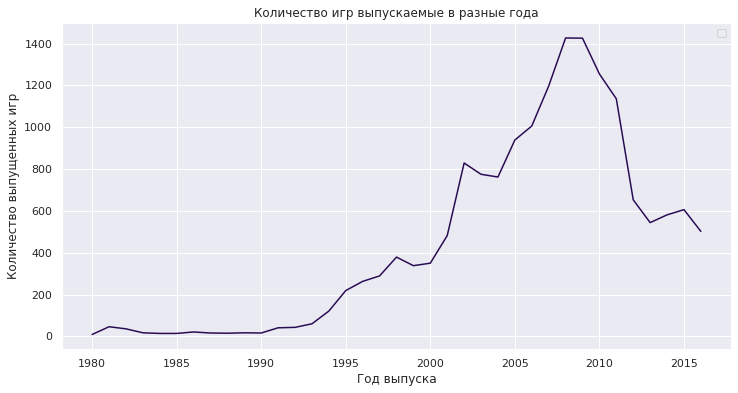

In [26]:
games_on_period = data.pivot_table(index='year_of_release', values='name', aggfunc='count')

plt.figure(figsize=(12,6))

sns.lineplot(data=games_on_period)

plt.title("Количество игр выпускаемые в разные года")

plt.xlabel("Год выпуска")

plt.ylabel("Количество выпущенных игр")

plt.legend('')

Видим, что количество выпущенных игр начало расти с большой скоростью с 90х годов до 2007-2008 года с пиком активности в 2008 году. Затем обнаруживается спад активности выпуска игр. Вероятно, это связано с развитием индустрии игр на прочих платформах.

**Посмотрим, как менялись продажи по платформам.**

*Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?*

Визуализируем с помощью метода pivot_table и barplot суммарные продажи по платформам за весь период.

Text(0, 0.5, 'Количество продаж')

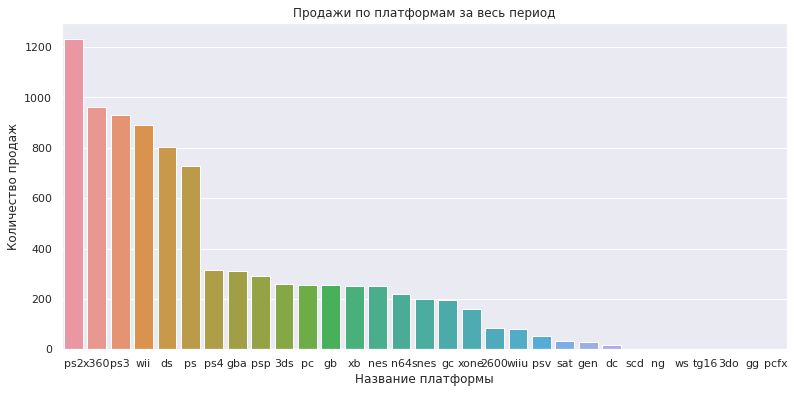

In [27]:
platform_on_sales = data.pivot_table(
    index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

plt.figure(figsize=(13,6))
sns.barplot(x=platform_on_sales.index,y=platform_on_sales['total_sales'])
plt.title("Продажи по платформам за весь период")
plt.xlabel("Название платформы")
plt.ylabel("Количество продаж")

Из графика видно, что самые популярные игровые платформы за весь период это PS2, X360, PS3, WII, DS, PS

*Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не будем учитывать в работе данные за предыдущие годы.*

За актуальный период я приняла промежуток с 2010 по 2015 года. До 2005 наблюдается рост, но это период стремительного развития индустрии и для прогноза на 2017 год подобная динамика не подходит, В промежуток с 2005 по 2010 наблюдается уверенное развитие и плато. Период после 2010 года отражает как пик активности области, так и тенденцию к снижению активности в ней. Если взять только последние 5 лет, часть популярных платформ этот период "застанут" не в полном объеме, тк прекратят свое существование. Но в связи с необходимостью сделат прогноз на 2017 год, а так же стремительно изменяющихся "настроений " в индустрии, решено взять  промежуток в 3 лет,  с 2013 по 2016.

Формируем сводную таблицу с необходимым периодом:

In [28]:

def year_total_sale_for_platform(name, data):
    slicee = data[(data['platform'] == name) & (data['year_of_release'] >= 2013)]
    total = slicee.pivot_table(index='year_of_release', values='total_sales', aggfunc='sum').sort_values('year_of_release', ascending=False)
    return total

*Какие платформы лидируют по продажам, растут или падают? Выберем несколько потенциально прибыльных платформ.*

Сформируем таблицу по платформам и их обшим продажам. Отсортируем их по убыванию и оставим только  5 наиболее прибыльных.

In [29]:
top_5_platforms = data[data['year_of_release']>=2013].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
top_5_platforms = top_5_platforms.reset_index().rename_axis(None, axis=1)

top_5_platforms.head()

,platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80


In [30]:
reviewer_top_5_platforms = data[data['year_of_release']>=2013].pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)
reviewer_top_5_platforms = reviewer_top_5_platforms.reset_index().rename_axis(None, axis=1)

reviewer_top_5_platforms.head()

,platform,total_sales
0,ps4,314.14
1,ps3,181.43
2,xone,159.32
3,3ds,143.25
4,x360,136.80


Построим график, отражающий продажи популярных платформ за период с 2013 по 2015 год. 

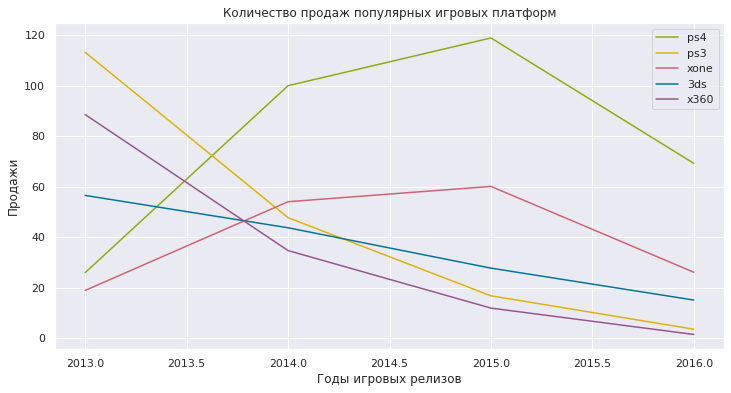

In [31]:
print('')

try:
    plt.figure(figsize=(12,6))
    plt.title('Количество продаж популярных игровых платформ')
    plt.xlabel('Годы игровых релизов')
    plt.ylabel('Продажи')

    for i, color in zip(list(top_5_platforms['platform']), ['#8eab12',  '#dbb40c', '#cf6275', '#047495', '#94568c']):
        sns.lineplot(data=year_total_sale_for_platform(i, data)['total_sales'], label=i, color=color)
        plt.legend()
    

except KeyError:
    print()   

*Выводы:*
Глядя на рафик, можно сделать следующие заключения:
- т к ни одна фирма на графике не "начинает" с нуля, можно сказать, что успешных новичков на горизонте с 2013 года не было и все представленные компании существуют уже продолжительное время;
- самые продаваемые это  продукты Sony Play Station  и XBOX, их можно считать наиболее перспективными и надежными относительно прочих;
- С начала 2015  года наблюдается стойкое снижение продаж по всем платформам. Особенно выражено у PS4 и XOne, тк до этого у этих платформ наблюдался пик продаж.

*За какой характерный срок появляются новые и исчезают старые платформы?*

Для разнообразия решила построить тепловую карту из сводной таблицы с продажами платформ по годам.

Можно было бы выделить наиболее "продаваемые" платформы, но они наиболее живучи, и о некой средней продолжительности жизни сказать будет затруднительно. 

<AxesSubplot:xlabel='year_of_release', ylabel='platform'>

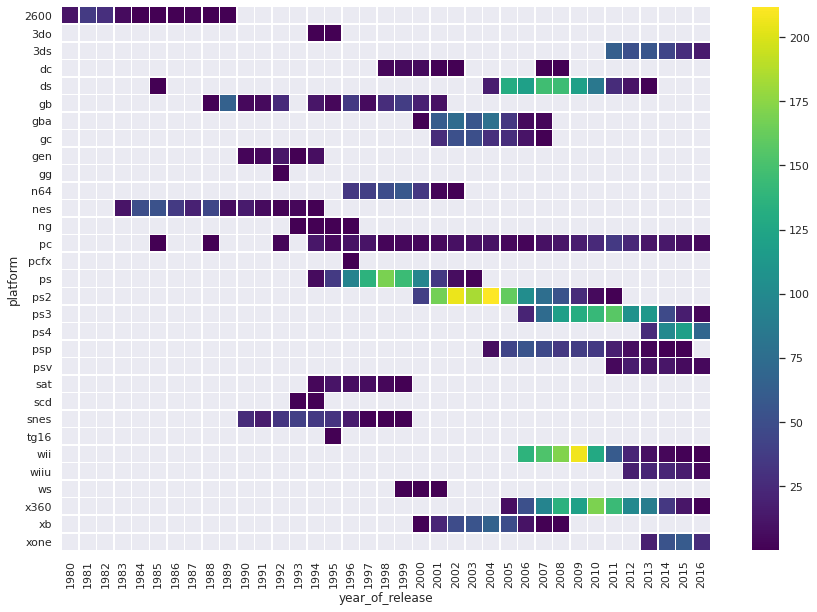

In [32]:
data_plat=data.pivot_table(index="platform",columns='year_of_release',values='total_sales',aggfunc=('sum'))

plt.figure(figsize=(15,10))
sns.heatmap(data_plat, linewidth=0.5, linecolor='w', square=True,  cmap="viridis")

*Вывод:* по тепловой карте можно сказать, что среднее время существования платформ около 8-10 лет. Есть платформы-долгожители, а есть пионеры области, не выдержавшие конкуренции. Так же, наибольшее количество новых фирм приходится на года расцвета индустрии.

**Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишем результат.**

In [33]:
print('Сохраним в переменной df_top_5_platforms топ5 вышеобозначенных платформ и избавимся от выбросов')
list_of_top5 = ['x360','ps3','ps4', 'xone', '3ds']
df_top_5_platforms = data[data['platform'].isin(['x360','ps3','ps4', 'xone', '3ds'])]
df_top_5_platforms = df_top_5_platforms[df_top_5_platforms['total_sales']<1.4]


Сохраним в переменной df_top_5_platforms топ5 вышеобозначенных платформ и избавимся от выбросов


In [34]:
print('Методом describe выведем статистику по столбцу с продажами таблицы')
df_top_5_platforms['total_sales'].describe()

Методом describe выведем статистику по столбцу с продажами таблицы


count    3239.000000
mean        0.319546
std         0.329381
min         0.000000
25%         0.080000
50%         0.190000
75%         0.470000
max         1.390000
Name: total_sales, dtype: float64

Сформируем, согласно заданию проекта, "ящик с усами" по получившимся параметрам:


Text(0, 0.5, 'Глобальные продажи')

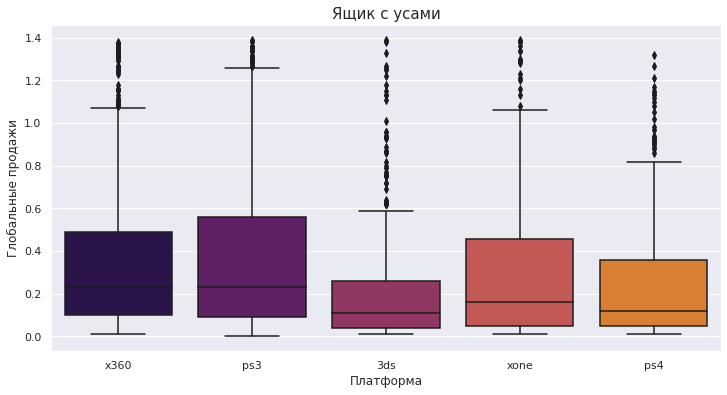

In [35]:
print('Сформируем, согласно заданию проекта, "ящик с усами" по получившимся параметрам:')

plt.figure(figsize=(12,6))
sns.boxplot(data=df_top_5_platforms, x='platform', y='total_sales')
plt.title('Ящик с усами', fontsize=15)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи',fontsize=12)

*Вывод:*
- как и в прошлых расчетах, лидеры продаж  PS3, затем X360 и xone, и 3ds  на последнем месте.
- так же, видно, что  медианные значения продаж у всех платформ распределены по-разному.

**Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построем диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.**

In [36]:
rev_query = data[data['platform'] == 'ps4']
display(rev_query['total_sales'].corr(rev_query['critic_score']))
display(rev_query['total_sales'].corr(rev_query[rev_query['critic_score'] !=0]['critic_score']))

0.2275496062775265

0.406567902061781

In [38]:
data_new=df_top_5_platforms[df_top_5_platforms['year_of_release'] >= 2013]
data_new=data_new.reset_index(drop=True)

In [39]:
sony_play_station3 = data_new[data_new['platform']=='ps3']
sony_play_station3= sony_play_station3[sony_play_station3['user_score'] > 0]
sony_play_station3= sony_play_station3[sony_play_station3['critic_score'] > 0]
print('Вычисляем корреляцию между оценками пользователей и продажами на платформе ps3:', round(sony_play_station3['user_score'].corr(sony_play_station3['total_sales']), 3))

Вычисляем корреляцию между оценками пользователей и продажами на платформе ps3: 0.083


Построим диаграмму рассеяния по продажам:

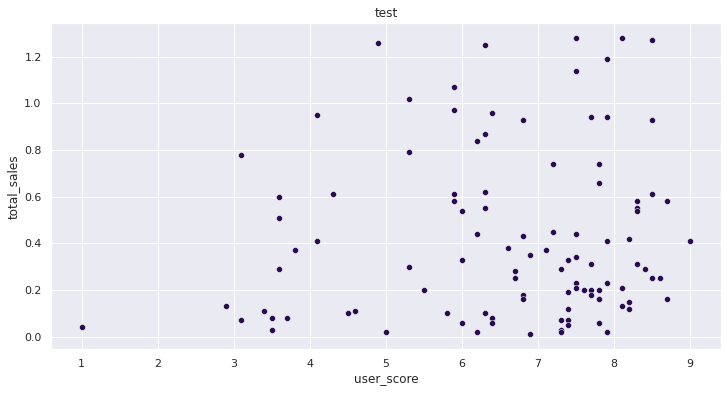

In [40]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='user_score', y='total_sales', data=sony_play_station3)

plt.title('test')
plt.show()

Построим диаграмму рассеяния по оценкам критиков:

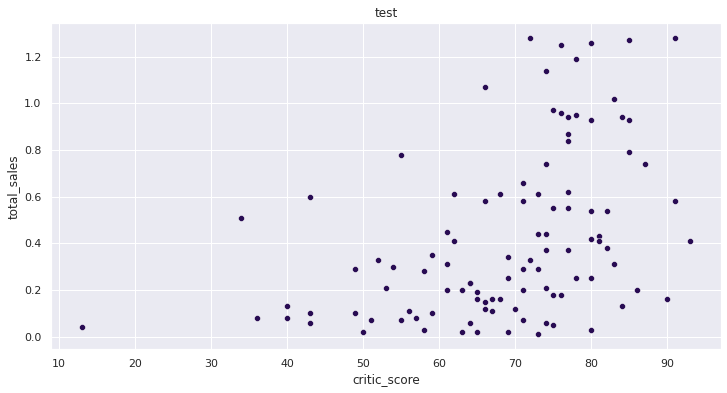

In [41]:
plt.figure(figsize=(12,6))
sns.scatterplot(x='critic_score', y='total_sales', data=sony_play_station3 )
plt.title('test')
plt.show()


In [42]:
print('Вычисляем корреляцию между оценкой критиков и продажам:', round(sony_play_station3['critic_score'].corr(sony_play_station3['total_sales']), 3))

Вычисляем корреляцию между оценкой критиков и продажам: 0.437


**Соотнесем выводы с продажами игр на других платформах.**

Сформируем функцию, которая будет визуализировать рассеивания и считать корреляцию. А так же распределятьзначения корреляции по её выраженноcти.

In [43]:
print
def other_platform_matrix(name_of_platform):
    platform = data_new[(data_new['platform']==name_of_platform) & (data_new['user_score'] >0) & ( data_new['critic_score'] >0)]
    fig, ax = plt.subplots(1 ,2, figsize=(15,5))
    sns.scatterplot(x='user_score', y='total_sales', data=platform, ax=ax[0])
    sns.scatterplot(x='critic_score', y='total_sales', data=platform, ax=ax[1])
    fig.suptitle(name_of_platform, fontsize=15)
    ax[0].set(xlabel='Оценка пользователей')
    ax[1].set(xlabel='Оценка критиков')
    ax[0].set(ylabel='Количество продаж')
    ax[1].set(ylabel='Количество продаж')
    plt.show()
    
    correl = round(platform['user_score'].corr(platform['total_sales']), 3)
    critic_correl = round(platform['critic_score'].corr(platform['total_sales']), 3)
    
    
    if 0.3 >= critic_correl >= 0.1:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Слабая', critic_correl)
    if 0.5 >= critic_correl >= 0.3:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Умеренная', critic_correl)
    if 0.7 >= critic_correl >= 0.5:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Высокая', critic_correl)
    if 0.9 >= critic_correl >= 0.7:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Весьма высокая', critic_correl)
    if 1 >= critic_correl >= 0.9:
        print('Корреляция между отзывами критиков и игровой платформой ', name_of_platform.upper(), ': Сильная', critic_correl)
    
    if 0.3 >= correl :
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Слабая', correl)
    if 0.5 >= correl >= 0.3:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Умеренная', correl)
    if 0.7 >= correl >= 0.5:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Высокая', correl)
    if 0.9 >= correl >= 0.7:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Весьма высокая', correl)
    if 1 >= correl >= 0.9:
        print('Корреляция между отзывами пользователей и продажами ', name_of_platform.upper(), ': Сильная', correl)
    print('\n')

Используя полученную функцию, построим диаграммы рассеяния для платформ, входящих в тройку самых популярных за актуальный период.

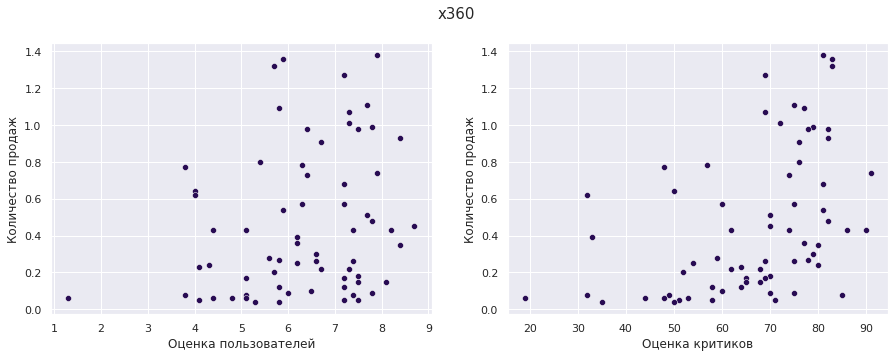

Корреляция между отзывами критиков и игровой платформой  X360 : Умеренная 0.44
Корреляция между отзывами пользователей и продажами  X360 : Слабая 0.239




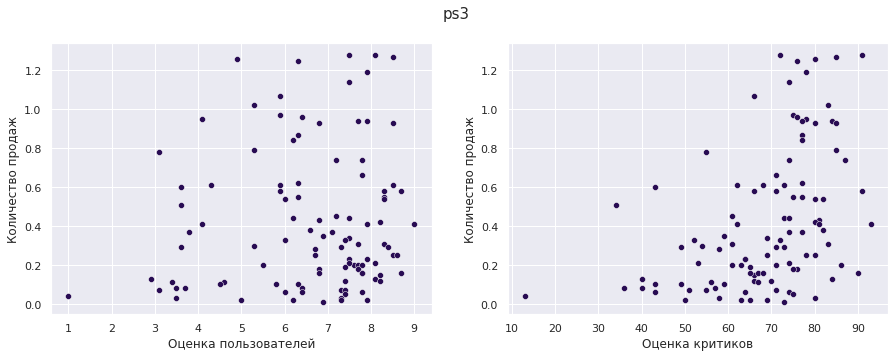

Корреляция между отзывами критиков и игровой платформой  PS3 : Умеренная 0.437
Корреляция между отзывами пользователей и продажами  PS3 : Слабая 0.083




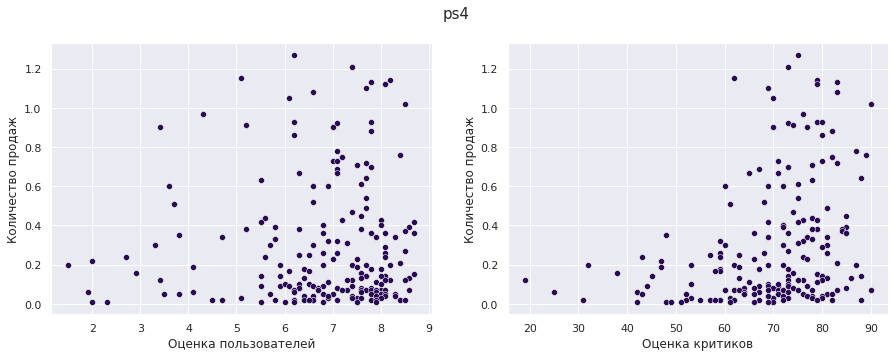

Корреляция между отзывами критиков и игровой платформой  PS4 : Умеренная 0.312
Корреляция между отзывами пользователей и продажами  PS4 : Слабая 0.025




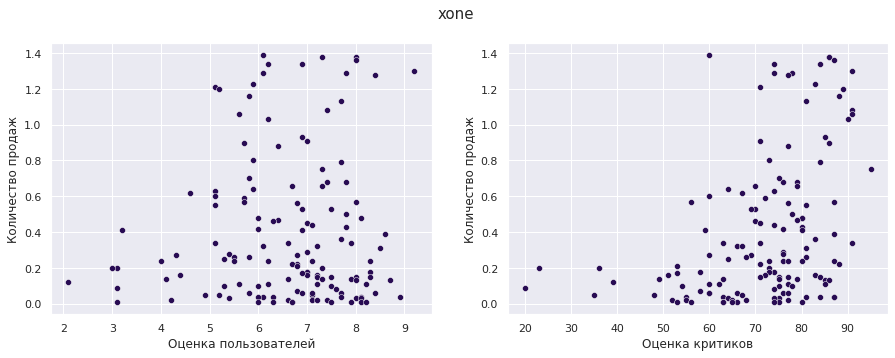

Корреляция между отзывами критиков и игровой платформой  XONE : Умеренная 0.399
Корреляция между отзывами пользователей и продажами  XONE : Слабая 0.046




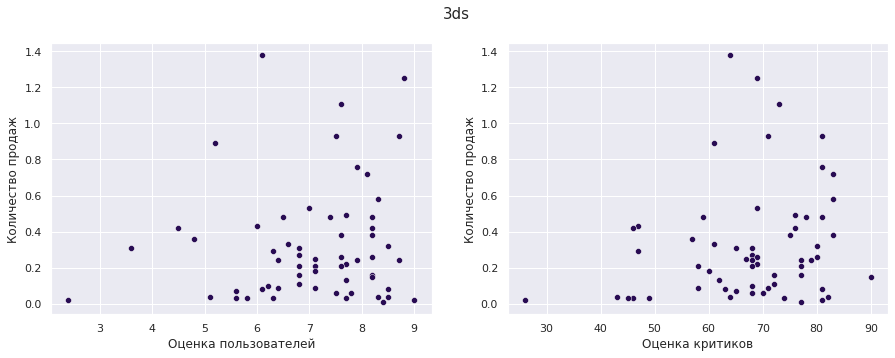

Корреляция между отзывами критиков и игровой платформой  3DS : Слабая 0.189
Корреляция между отзывами пользователей и продажами  3DS : Слабая 0.12




In [44]:
for platform in list_of_top5:
    other_platform_matrix(platform)

Используя вторую функцию рассчитаем дисперсию, стандартное отклонение, среднее и медиану у пяти популярных  платформ к оценкам пользователей:

In [45]:
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', round(np.var(data_new[data_new['platform']==platform]['user_score']), 2))
    print('Стандартное отклонение', platform.upper(),':', round(np.std(data_new[data_new['platform']==platform]['user_score']), 2))
    print('Среднее',platform.upper(),':',  round(data_new[data_new['platform']==platform]['user_score'].mean(), 2))
    print('Медиана',platform.upper(),':',  data_new[data_new['platform']==platform]['user_score'].median())
    print('\n')

Дисперсия X360 : 8.67
Стандартное отклонение X360 : 2.94
Среднее X360 : 4.57
Медиана X360 : 5.7


Дисперсия PS3 : 11.77
Стандартное отклонение PS3 : 3.43
Среднее PS3 : 3.28
Медиана PS3 : 2.9


Дисперсия PS4 : 12.2
Стандартное отклонение PS4 : 3.49
Среднее PS4 : 4.17
Медиана PS4 : 5.85


Дисперсия XONE : 10.24
Стандартное отклонение XONE : 3.2
Среднее XONE : 4.67
Медиана XONE : 6.0


Дисперсия 3DS : 9.71
Стандартное отклонение 3DS : 3.12
Среднее 3DS : 1.8
Медиана 3DS : 0.0




Тем же способом рассчитаем дисперсию, стандартное отклонение, среднее и медиану по оценкам критиков:

In [46]:
for platform in list_of_top5:
    print('Дисперсия', platform.upper(),':', round(np.var(data_new[data_new['platform']==platform]['critic_score']), 2))
    print('Стандартное отклонение', platform.upper(),':', round(np.std(data_new[data_new['platform']==platform]['critic_score']), 2))
    print('Среднее',platform.upper(),':',  round(data_new[data_new['platform']==platform]['critic_score'].mean(), 2))
    print('Медиана',platform.upper(),':',  data_new[data_new['platform']==platform]['critic_score'].median())
    print('\n')

Дисперсия X360 : 1165.91
Стандартное отклонение X360 : 34.15
Среднее X360 : 27.33
Медиана X360 : 0.0


Дисперсия PS3 : 1094.04
Стандартное отклонение PS3 : 33.08
Среднее PS3 : 22.47
Медиана PS3 : 0.0


Дисперсия PS4 : 1254.57
Стандартное отклонение PS4 : 35.42
Среднее PS4 : 41.87
Медиана PS4 : 59.5


Дисперсия XONE : 1268.83
Стандартное отклонение XONE : 35.62
Среднее XONE : 46.89
Медиана XONE : 64.0


Дисперсия 3DS : 832.96
Стандартное отклонение 3DS : 28.86
Среднее 3DS : 15.4
Медиана 3DS : 0.0




*Из получившихся данных можно сделать вывод, что  оценки пользователей и критиков коррелируются с продажами. Так же, видно, что оценка пользователей влияет на продажи значительно слабее, чем оценка критиков. Т е, мнение критиков для пользователей решающее при покупке.* 


**Посмотрим на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

Сформируем сводную таблицу по жанрам и их продаваемости за актуальный период. 

Вычислим и выведем на экран среднее и медианное значение продаж за актуальный период в каждом жанре:

In [47]:
genre_dict_mean= {}
genre_dict_median = {}

for genre in genre_list:
    genre_mean = round(data_new[data_new['genre'] == genre]['total_sales'].mean(), 2 )
    genre_median = round(data_new[data_new['genre'] == genre]['total_sales'].median(), 2)
    print(f'Среднее значение по общим продажам игр в жанре {genre}: {genre_mean}', f'Медианное значение продаж в жанре {genre}: {genre_median}',  sep='\n', end='\n\n')
    genre_dict_mean[genre] = genre_mean
    genre_dict_median[genre] = genre_median
    
    


Среднее значение по общим продажам игр в жанре sports: 0.35
Медианное значение продаж в жанре sports: 0.2

Среднее значение по общим продажам игр в жанре platform: 0.3
Медианное значение продаж в жанре platform: 0.16

Среднее значение по общим продажам игр в жанре racing: 0.26
Медианное значение продаж в жанре racing: 0.12

Среднее значение по общим продажам игр в жанре role-playing: 0.28
Медианное значение продаж в жанре role-playing: 0.12

Среднее значение по общим продажам игр в жанре puzzle: 0.16
Медианное значение продаж в жанре puzzle: 0.07

Среднее значение по общим продажам игр в жанре misc: 0.22
Медианное значение продаж в жанре misc: 0.11

Среднее значение по общим продажам игр в жанре shooter: 0.41
Медианное значение продаж в жанре shooter: 0.33

Среднее значение по общим продажам игр в жанре simulation: 0.14
Медианное значение продаж в жанре simulation: 0.09

Среднее значение по общим продажам игр в жанре action: 0.25
Медианное значение продаж в жанре action: 0.11

Среднее 

Далее формирую таблицу со средними и медианными значениями по играм.

In [48]:
#genre_mean = pd.DataFrame([genre_dict_mean])
genre_mean = pd.DataFrame.from_dict(genre_dict_mean, orient='index').reset_index(level=0).rename(columns={'index':'genre', 0:'mean_sales'})
genre_median = pd.DataFrame.from_dict(genre_dict_median, orient='index').reset_index(level=0).rename(columns={'index':'genre', 0:'median_sales'})
genre_stat= pd.concat([genre_mean, genre_median['median_sales']], axis=1)
genre_stat = genre_stat.sort_values(by='median_sales', ascending=False)
genre_stat

#genre_median

,genre,mean_sales,median_sales
6,shooter,0.41,0.33
0,sports,0.35,0.20
1,platform,0.30,0.16
9,fighting,0.29,0.13
2,racing,0.26,0.12
3,role-playing,0.28,0.12
5,misc,0.22,0.11
8,action,0.25,0.11
7,simulation,0.14,0.09
11,strategy,0.13,0.08


Визуализируем полученные данные:


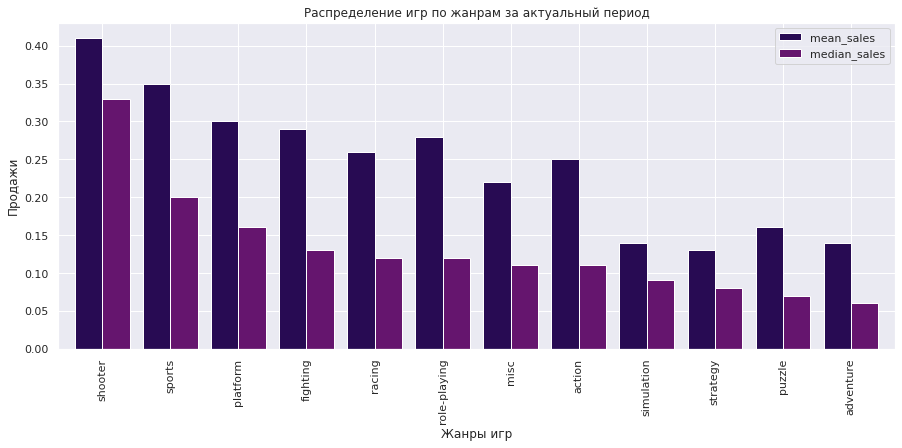

In [49]:
print('Визуализируем полученные данные:')

genre_stat.sort_values(by='median_sales', ascending=False).plot(x="genre", y=["mean_sales", "median_sales"], kind="bar", figsize=(15, 6), title='Распределение игр по жанрам за актуальный период', width=0.80)
plt.xlabel('Жанры игр',fontsize=12)
plt.ylabel('Продажи',fontsize=12)
plt.show()

**Вывод:**

На основании полученных данных, мы можем сказать, что среднее продаж и их медиана значительно отличаются. Так как нам нужно выделить наиболее стабильно прибыльный жанр, то в качестве критерия лучше использовать медианные значения, т к высокие средние могут быть результатом присутствия супердорогих игр или выпуска суперпопулярных игр в определенный момент времени. 

Итого выходит, что топ-4 самых продаваемых жанров включает игры-шутеры, далее идут файтинги и ролевые игры и экшен. Наименее популярны пазлы и стратегии. Вероятно, из-за неудобства управления.

**Вывод по исследовательскому анализу данных:**
- Количество игр на игровые приставки и компьютеры начало расти с большой скоростью с 90х годов до 2008 года.  С 2008 года, после того как массово начали создавать мобильные приложения и мобильные игры, произошел резкий спад разработок игр на игровые платформы.
- Самые популярные игровые платформы за весь период : Sony PlayStation 2(хоть его и сменил PS3 и PS4), Xbox 360, Sony Playstation 3, Nintendo WII, Nintendo DS.
- Средняя жизнь игровой платформы составляет 8-10 лет. 
- Больше всего продаются игры на Sony Playstation(3 и 4) и Xbox 360 и One
- Наблюдается взаимосвязь между продажами и оценками критиков и пользователей. Заметнее всего корреляция между оценками критиков и продажами. Это значит для людей мнение критиков важнее мнения других пользователей.


<h2> Составим портрет пользователя каждого региона. </h2>

Сформируем функцию для создания сводных таблиц с данными о пользователях по годам и выводу гистограмм.

In [50]:
def forpivot(row, title):
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = data.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n') 
        sns.set_palette('Set2')
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()


def for_pivot_2016(row, title):
    temp = data[data['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        print(ppivot)
        print('\n\n')
        sns.set_palette('Set3')
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

**Портрет пользователя North America**

Выведем топ-5 популярных у пользователей данной группы платформ, жанров и рейтингов за весь период. А затем за последний год.

  platform  na_sales
0     x360    595.74
1      ps2    572.92
2      wii    486.87
3      ps3    390.13
4       ds    380.31



      genre  na_sales
0    action    863.17
1    sports    671.20
2   shooter    584.83
3  platform    444.44
4      misc    399.57



  rating  na_sales
0      e   1972.25
1      t   1154.93
2      m    863.39
3   e10+    345.50
4    k-a      2.56





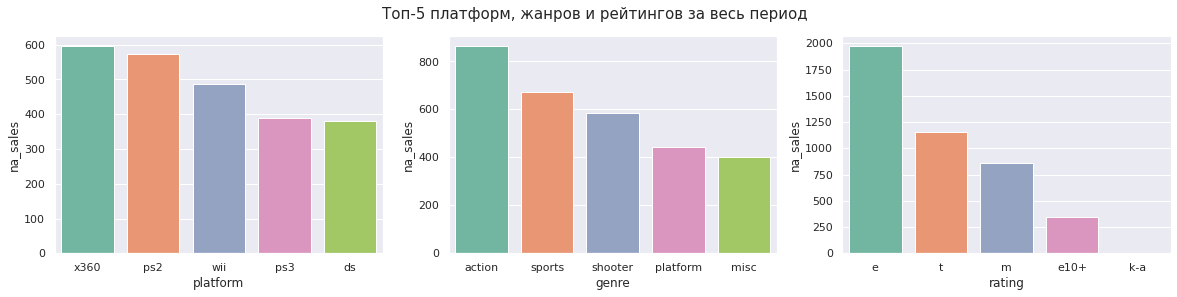

In [51]:
forpivot('na_sales','Топ-5 платформ, жанров и рейтингов за весь период')

  platform  na_sales
0      ps4     21.49
1     xone     14.27
2      3ds      4.14
3     wiiu      2.10
4       pc      1.36



          genre  na_sales
0       shooter     16.24
1        action      9.29
2        sports      7.54
3  role-playing      5.89
4      fighting      1.84



  rating  na_sales
0      m     16.78
1      t     14.98
2      e      9.36
3   e10+      3.81





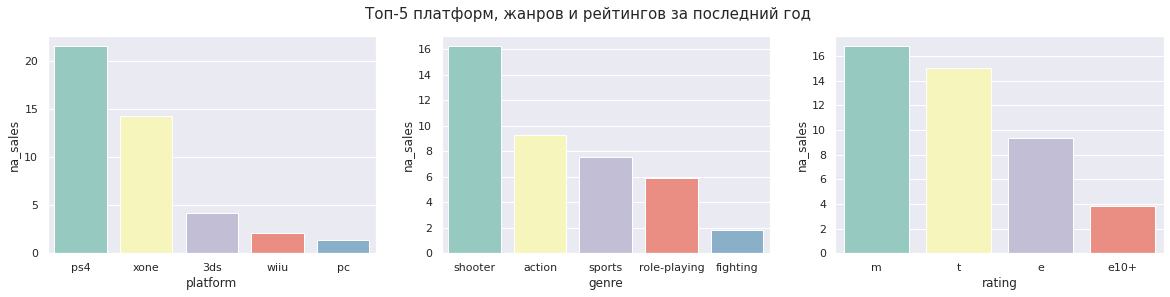

In [52]:
for_pivot_2016('na_sales','Топ-5 платформ, жанров и рейтингов за последний год')

*Выводы по пользователям из Северной Америки:*

*1) за всё время:*
- Самые популярные игровые платформы: XBOX, PS2, WII, PS3, DS;
- Топ-5 жанров игр: action, sports, shooter, platform, misc;
- наиболее популярны игры с рейтингом "для всех", затем идут игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше".

*2) за последний год произошли следующие изменения:*
- Топ игровых приставок выглядит таким образом : PS4, Xone, DS3;
- Топ жанров игр: Shooter, Action, Sports;
- Топ рейтингов игр : "От 17 и выше" , "от 13 и выше" и "для всех".

**Портрет пользователя European Union**

По тому же принципу выводим 5 самых популярных значений в категориях платформ, жанров и рейтинга для пользователей из Евросоюза за всё время и за последний год соотвтественно.

  platform  eu_sales
0      ps2    332.63
1      ps3    327.21
2     x360    268.32
3      wii    258.32
4       ps    212.39



     genre  eu_sales
0   action    510.99
1   sports    371.33
2  shooter    314.52
3   racing    234.49
4     misc    210.60



  rating  eu_sales
0      e   1062.12
1      t    628.68
2      m    524.51
3   e10+    183.35
4     ao      0.61





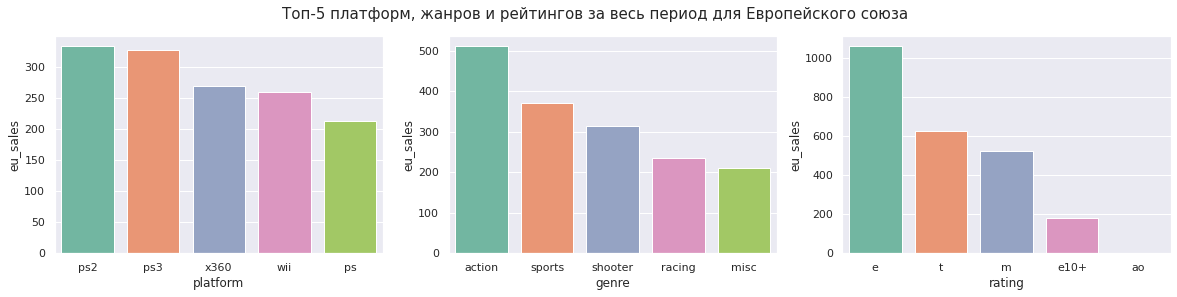

In [53]:
forpivot('eu_sales','Топ-5 платформ, жанров и рейтингов за весь период для Европейского союза')

  platform  eu_sales
0      ps4     31.78
1     xone      9.63
2       pc      3.53
3      3ds      2.33
4     wiiu      1.48



          genre  eu_sales
0       shooter     15.90
1        sports     12.01
2        action     10.68
3  role-playing      4.28
4        racing      1.77



  rating  eu_sales
0      m     17.61
1      e     16.06
2      t     13.74
3   e10+      3.81





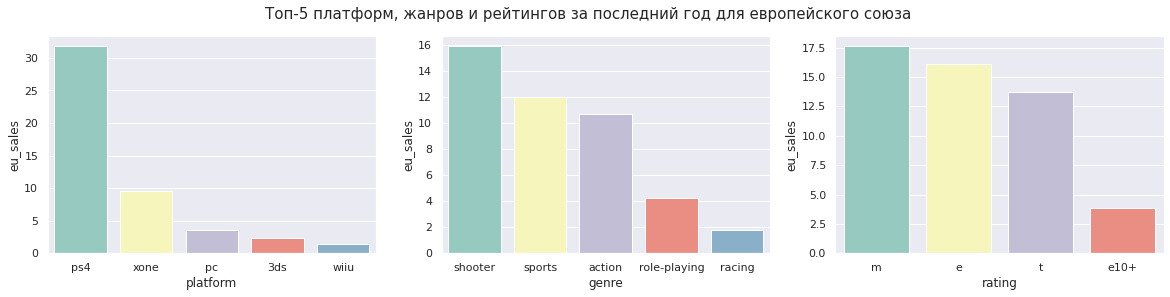

In [54]:
for_pivot_2016('eu_sales','Топ-5 платформ, жанров и рейтингов за последний год для европейского союза')

*Выводы по пользователям из Европы:*

*1) за всё время:*
- Самые популярные игровые платформы: PS2, PS3, X360, WII, PS;
- Топ 5 жанров: action, sports, shooter, racing, misc;
- Больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше";

*2) за последний год произошли следующие изменения:*
- Топ жанров стал: shooter, sports, action;
- Топ платформ: PS4, Xone, PC;
- Топ рейтингов: "От 17 и выше" , "Для всех" и "от 13 и выше".

**Портрет пользователя Japanese**


Так же выводим 5 самых популярных значений в категориях платформ, жанров и рейтинга для пользователей из Японии за всё время и за последний год соотвтественно.

  platform  jp_sales
0       ds    175.02
1       ps    139.78
2      ps2    137.54
3     snes    116.55
4      3ds    100.62



          genre  jp_sales
0  role-playing    353.39
1        action    160.14
2        sports    134.93
3      platform    130.71
4          misc    107.02



  rating  jp_sales
0      e    603.61
1      t    562.20
2      m     83.17
3   e10+     40.20
4    k-a      1.46





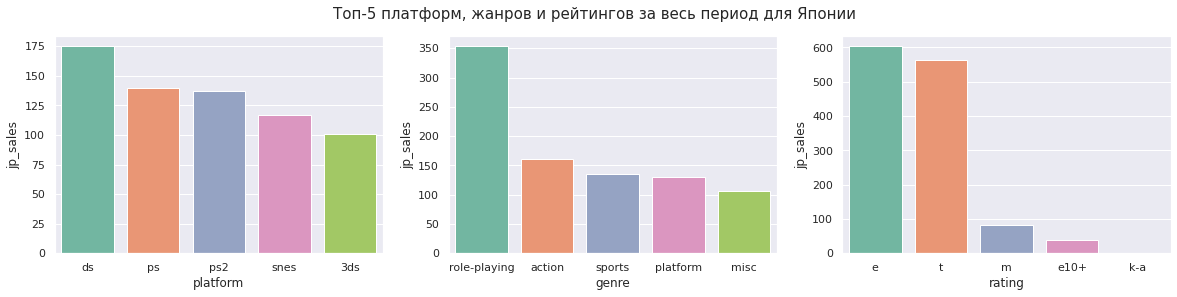

In [55]:
forpivot('jp_sales','Топ-5 платформ, жанров и рейтингов за весь период для Японии')

  platform  jp_sales
0      3ds      8.03
1      ps4      5.74
2      psv      3.56
3      ps3      1.30
4     wiiu      0.67



          genre  jp_sales
0        action      7.07
1  role-playing      6.61
2     adventure      1.18
3       shooter      1.06
4          misc      1.04



  rating  jp_sales
0      t     13.70
1      e      3.94
2      m      1.22
3   e10+      0.45





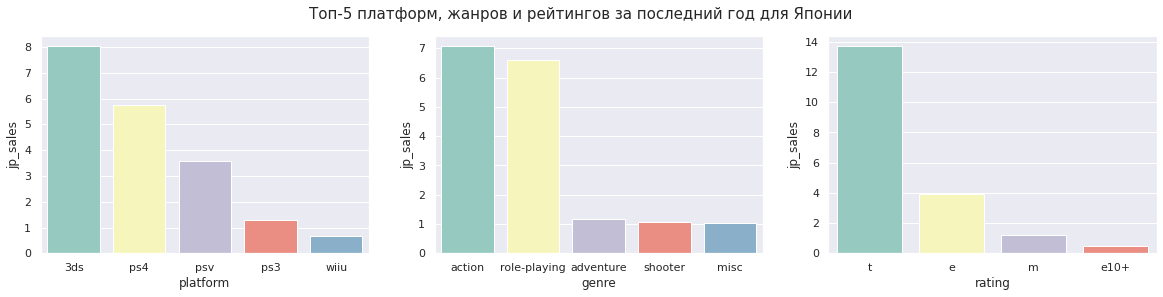

In [56]:
for_pivot_2016('jp_sales','Топ-5 платформ, жанров и рейтингов за последний год для Японии')

*Выводы по пользователям из Японии:*

*1) за всё время:*
- Самые популярные игровые платформы в Японии это: DS, PS, PS2, SNES, 3DS;
- Топ-5 жанров в Японии : Role-Playing, action, sports, platform, misc;
- Больше всего продаж у игр с рейтингом "для всех", на втором месте игры с рейтингом "от 13 и выше" и на третьем месте игры с рейтингом "от 17 и выше";


*2) за последний год произошли следующие изменения:*
- топ платформ: 3ds, ps4, psv;
- Топ жанров: action, role-playing, adventure;
- топ рейтингов: "от 13 и выше", "для всех" и "от 17 и выше".

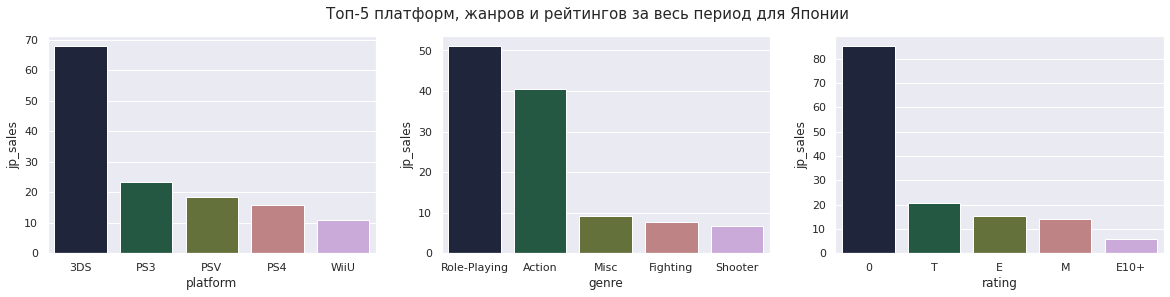

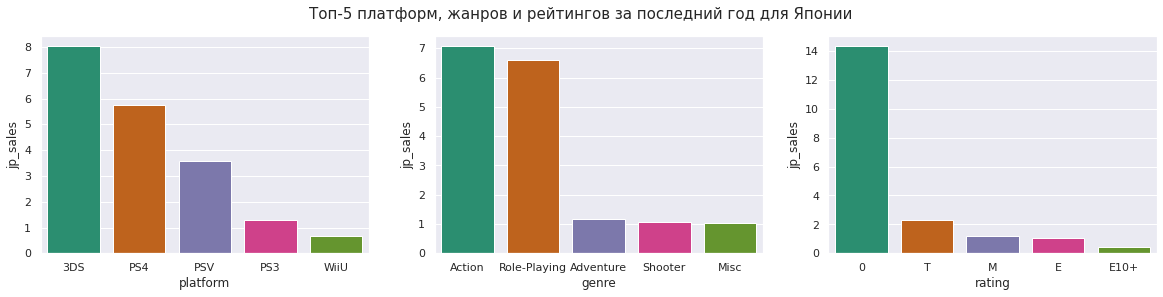

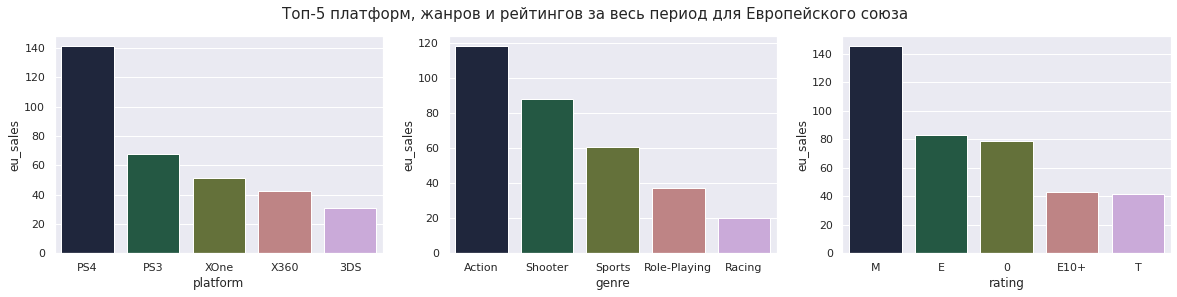

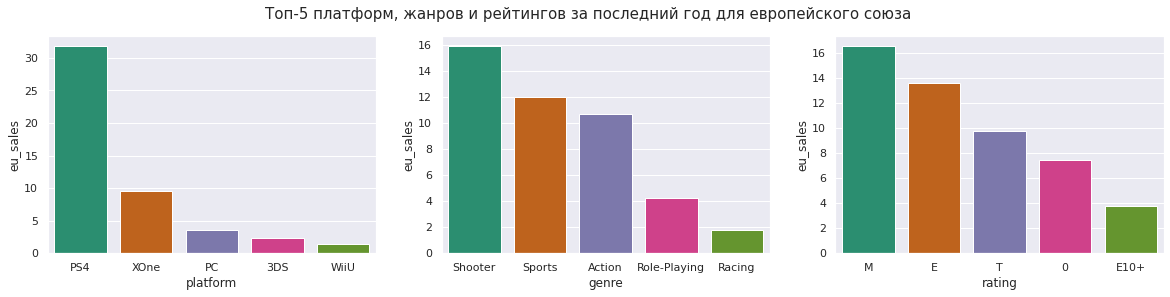

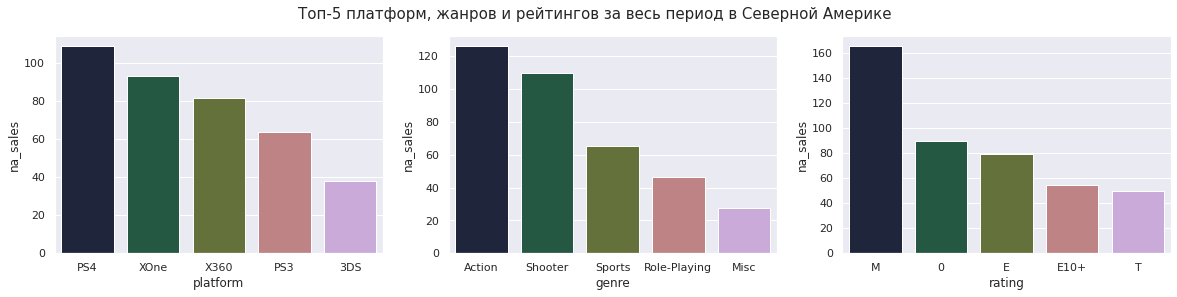

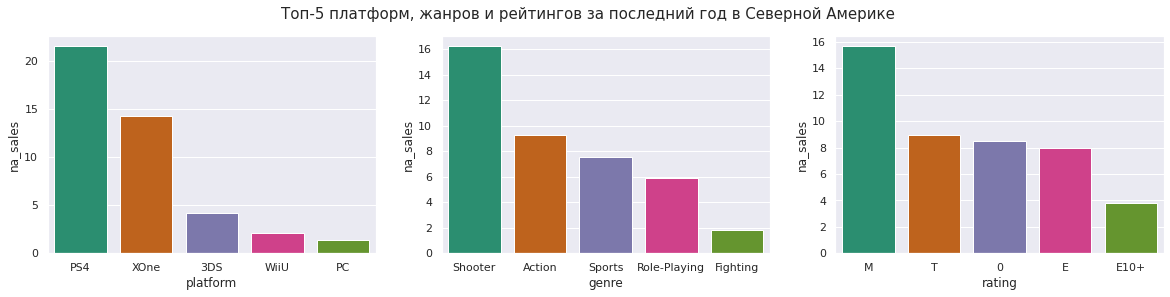

In [57]:
data0 = pd.read_csv('/datasets/games.csv', index_col=0)
data0.columns = data0.columns.str.lower()
data0['rating'] = data0['rating'].fillna(0)
data0 = data0[data0['year_of_release']>2012]
def forpivot(row, title):
    
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']),axes.flatten()[:3]):
        ppivot = data0.pivot_table(index=pivot, values=row, aggfunc='sum'
                  ).sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        #print(ppivot)
        #print('\n\n') 
        sns.set_palette('cubehelix')
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
        

plt.show()
sns.set()

def for_pivot_2016(row, title):
    temp = data0[data0['year_of_release']>2015]
    fig, axes = plt.subplots(1, 3, figsize=(20, 4))
    for pivot, ax in zip(list(['platform','genre','rating']), axes.flatten()[:3]):
        ppivot = temp.pivot_table(index=pivot, values=row, aggfunc='sum').sort_values(by=row, ascending=False).reset_index().rename_axis(None, axis=1).head(5)
        #print(ppivot)
        #print('\n\n')
        sns.set_palette('Dark2')
        sns.barplot(data=ppivot, x=pivot, y=row, ax=ax)
        fig.suptitle(title, fontsize=15)
  
forpivot('jp_sales','Топ-5 платформ, жанров и рейтингов за весь период для Японии')
for_pivot_2016('jp_sales','Топ-5 платформ, жанров и рейтингов за последний год для Японии')

forpivot('eu_sales','Топ-5 платформ, жанров и рейтингов за весь период для Европейского союза')
for_pivot_2016('eu_sales','Топ-5 платформ, жанров и рейтингов за последний год для европейского союза')

forpivot('na_sales','Топ-5 платформ, жанров и рейтингов за весь период в Северной Америке')
for_pivot_2016('na_sales','Топ-5 платформ, жанров и рейтингов за последний год в Северной Америке')

**Общий вывод по портретам пользователей:**  Как можно увидеть при сравнении  показателей, предпочтения пользователей значительно отличаются за последний год с показателями, статистически преобладающими за все время. Из чего можно сделать вывод, что при составлении прогноза на ближайшее будущее логичней ориентироваться на вкусы пользователей в послдний год. Следовательно, с высокой вероятностью в 2017 году будут более востребованы:

* В Северной Америке:
   - игры жанра Shooter, Action, Sports, рейтинга "От 17 и выше", "от 13 и выше",   платфрмы PS4, Xone, DS3.


* В Европе:
   - игры жанра shooter, sports, action, рейтинга "От 17 и выше", "Для всех", платфрмы PS2, PS3, X360.
   
   
* В Японии:
   - игры жанра action, role-playing, adventure, рейтинга "от 13 и выше", "от 17 и выше",   платфрмы 3ds, ps4, psv.

<h2>Проверяем гипотезы.</h2>

**Гипотеза №1: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.**

Сформулируем нулевую гипотезу:
* H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Альтернативная гипотеза: 
* H₁: Средние пользовательские рейтинги платформ Xbox One и PC различаются

Определим переменные xbox_uscore и pc_uscore, которым присвоим актуальные данные за последние 10 лет о рейтинге платформ у пользователей.

In [58]:
xone_uscore = data[(data['platform']=='xone') & (data['year_of_release']>2010) & (data['user_score']>0)]['user_score']
pc_uscore = data[(data['platform']=='pc') & (data['year_of_release']>2010) & (data['user_score']>0)]['user_score']

print('Cредний рейтинг пользователя для xbox платформ:', round(xone_uscore.mean(), 2))

print('Cосчитаем средний рейтинг пользователя для pc платформ:', round(pc_uscore.mean(), 2))

Cредний рейтинг пользователя для xbox платформ: 6.52
Cосчитаем средний рейтинг пользователя для pc платформ: 6.45


Выполним проверку гипотезы методом ttest_ind(Т-тест Стьюдента). Выясним, есть ли различия в средних значениях рейтингов платформ среди пользователей и насколько они значительны. Исходя их смысла теста, это даст нам представление о том, могли ли эти различия возникнуть случайно.

Примем за альфа-значение 0,01.

In [59]:
alpha = .01

results = st.ttest_ind(xone_uscore.dropna(), pc_uscore.dropna(), equal_var=False)

print('p-значение:', round( results.pvalue, 3))


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.613
Не получилось отвергнуть нулевую гипотезу


**Вывод:**  Не получилось отвергнуть нулевую гипотезу. Т е с большей вероятностью рейтинги платформ будут одинаковыми, но с вроятностью в 25% можно получить значимые различия.

**Гипотеза №2: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные**

За нулевую гипотезу принимаем:
* H₀: Средние пользовательские рейтинги жанров Action и Sports одинаковые

Альтернативная гипотеза:
* H₁: Средние пользовательские рейтинги жанров Action и Sports различаются

Сохраним в переменных genre_action_hyp и genre_sports_hyp соответствующие данные с пользовательскими оценками

In [60]:
genre_action_uscore = data[(data['genre']=='action') & (data['year_of_release']>2010) & (data['user_score']>0)]['user_score']
genre_sports_uscore = data[(data['genre']=='sports') & (data['year_of_release']>2010) & (data['user_score']>0)]['user_score']


print('Средний пользовательский рейтинг в  жанре Action: ', round(genre_action_uscore.mean(), 3))
print('Средний пользовательский рейтинг в жанре Sports: ', round(genre_sports_uscore.mean(), 3))

Средний пользовательский рейтинг в  жанре Action:  6.776
Средний пользовательский рейтинг в жанре Sports:  5.651


Так же выполним проверку гипотезы методом ttest_ind(Т-тест Стьюдента). Выясним, есть ли различия в средних значениях рейтингов платформ среди пользователей и насколько они значительны. Исходя их смысла теста, это даст нам представление о том, могли ли эти различия возникнуть случайно.

Примем за альфа-значение 0,01.

In [61]:
alpha = .01

results = st.ttest_ind(genre_action_uscore, genre_sports_uscore, equal_var=False)

print('p-значение:', results.pvalue ) #почему-то round мешает


if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 8.285648549432565e-19
Отвергаем нулевую гипотезу


**Вывод:** На основании полученного p-value, мы отвергаем нулевую гипотезу. Таким образом, у нас практически нет вероятности получить одинаковые средние рейнтинги по двум жанрам.

**Вывод по проверке гипотез.**

Выполнили проверку гипотез методом ttest_ind(Т-тест Стьюдента):
* Гипотезу о том, что средние пользовательские рейтинги платформ Xbox one и PC одинаковые, не удалось опровергнуть;
* Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные, на основании полученных данных можно отвергнуть. 

<h2> Общий вывод.</h2>

Перед непосредственно анализом, была выполнена предобработка данных: были изменены типы данных в столбцах, где это требовалось, переведены в нижний регистр содержимое таблицы и названия колонок. Так же, обработали пропуски и сомнительные значения(в частности, tbd), убедились в отсутствии дубликатов. Были выполнены и добавлены в таблицу расчеты суммарных продаж по платформам.  

Далее приступили к исследовательскому анализу данных, сопровождая расчеты подходящей визуализацией. Выяснили, что количество выпущенных игр начало расти с большой скоростью с 90х годов до 2007-2008 года с пиком активности в 2008 году. Затем обнаруживается спад активности выпуска игр. Можно предположить, что это связано с техническим прогрессом и внедрением новых технологий в сфере развлечений, набирующих большую популярность, вытесняя игры на представленных консолях. За весь период консольных приставок самыми популярными оказались: PS2, X360, PS3, WII, DS.  Также выяснилоь, что средняя продолжительность существования приставок составляет около 8-10 лет. С развитием отрасли открывалось больше фирм, со спадом активности в индустрии фирмы закрывались. Из сохранившихся к 2016 году фирм все старожилы, новичков в сфере не наблюдается.  За актуальный период для работы был взят промежуток в 4 года с 2013 по 2016 года. За этот период топ-5 игр составили: Sony Playstation(3 и 4) и Xbox 360 и One, WII. С начала 2015 года наблюдается стойкое снижение продаж по всем платформам. Особенно выражено у PS4 и XOne, тк до этого у этих платформ наблюдался пик продаж. После проведения анализа оценок пользователей и критиков, можно сделать вывод, что существует взаимосвязь между тем, как оценили игру критики и пользователи, и тем, насколько активней она продается. При том, покупатель больше ориентируетсяя на мнение критиков, чем на рейтинг пользователей. Так же определили, топ-4 самых продаваемых жанров включает игры-шутеры, далее идут файтинги и ролевые игры и экшен. Наименее популярны пазлы и стратегии. Вероятно, из-за неудобства управления.

Далее были составлены портреты пользователей для каждого региона. Исходя из цели дать прогноз на 2017год на основании полученных данных, были сделаны следующие выводы:  при сравнении  показателей, предпочтения пользователей значительно отличаются за последний год с показателями, статистически преобладающими за все время. Следовательно, что при составлении прогноза на ближайшее будущее логичней ориентироваться на вкусы пользователей в послдний год. Получаем, что с высокой вероятностью в 2017 году будут более востребованы:

* В Северной Америке:
   - игры жанра Shooter, Action, Sports, рейтинга "От 17 и выше", "от 13 и выше",   платфрмы PS4, Xone, DS3.


* В Европе:
   - игры жанра shooter, sports, action, рейтинга "От 17 и выше", "Для всех", платфрмы PS2, PS3, X360.
   
   
* В Японии:
   - игры жанра action, role-playing, adventure, рейтинга "от 13 и выше", "от 17 и выше",  платфрмы 3ds, ps4, psv.
   
Так же, исходя из большого процента нулевых значений в графе с оценкой ESRB, есть и другие системы оценки рейтинга игр, кроме ESRB, действующей в Северной Америке и Канаде. Вероятно, это связано со страной-производителем игр. Больше всего собственных игр на рынке Японии, у европейских пользователей тоже популярны "свои" игры, не оцененые ESRB. Что-то о рейтингах, входящих в эти 0 сказать нельзя. По сравнению с "заполненными" рейтингами у топ-3 из наличествующих значений изменений никаких.

Далее была выполнена проверка гипотез методом ttest_ind(Т-тест Стьюдента). Мы выяснили, есть ли различия в средних значениях рейтингов платформ среди пользователей и насколько они значительны. Исходя их смысла теста, это дало нам представление о том, могли ли эти различия возникнуть случайно.
По результатам проверки:
* Гипотезу о том, что средние пользовательские рейтинги платформ Xbox one и PC одинаковые, не удалось опровергнуть;
* Гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports разные, на основании полученных данных можно отвергнуть. 

По итогу проделанной работы можно сделать вывод, что индустрия консольных игр достаточно стремительными темпами идет на спад, что связано с развитием новых технологий и изменившимися в связи с этим требованиями и потребностями пользователей. Тем не менее, наиболее популярные платформы продолжают свое существование и продолжают выпускать новые игры. Рекомендации по итогам исследования можно дать следующие: в связи со стремительно меняющимися предпочтениями пользователей, при планировании к выпуску игр и развитию платформы в целом, следует ориентироваться на статистические данные за небольшой, до года, период. А так же, принимать в расчет географию при продвижении той или иной игры в связи с разнящимися предпочтениями пользователей касательно жанра игры. Возможно, стоит сделать упор на более взрослую аудиторию.

